<a href="https://colab.research.google.com/github/damarismuli/Hypothyroidism-Test/blob/master/Hypothyroidism_Testing_On_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Defining the Question**

a) Specifying the Question

Creating a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

b) Defining the Metric for Success

To  determine the model that will results to most accurate prediction for hypothyroid patients.

c) Understanding the context

Understanding the symptoms of hypothyroid 

d) Recording the Experimental Design

In this project ,i imported the necessary libraries,loaded and explored datasets,Cleaned and verified data, performed Exploratory Data Analysis;Univariate, Bivariate and Multivariate Analysis to check on each variable, relationships and differences between different independent variables and the coorelation of the variables respectively.Then performed modeling using Decision trees and support vector Machines(SVM).

e) Data Relevance

The data provided was very relevant to the project.It washelpful in  determiningwhether or not the patient's symptoms indicated that the patient has hypothyroid.

http://bit.ly/hypothyroid_data

**2.Reading the Data**

In [1033]:
# Importing python libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import export_graphviz 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings(action = 'ignore')

In [959]:
# Loading Our Dataset
# ---
#Loading directly from url
url = 'http://bit.ly/hypothyroid_data'
df = pd.read_csv(url)
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


**3. Checking the Data**

In [960]:
# Determining the no. of records in the ranking dataset
#
df.shape

(3163, 26)

In [961]:
#Previewing the top 5 rows of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [962]:
#Previewing the last 5 rows of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [963]:
# Checking whether each column has an appropriate datatype 
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [964]:
# checking the information about our dataset
#
df.info

<bound method DataFrame.info of            status age sex on_thyroxine query_on_thyroxine  \
0     hypothyroid  72   M            f                  f   
1     hypothyroid  15   F            t                  f   
2     hypothyroid  24   M            f                  f   
3     hypothyroid  24   F            f                  f   
4     hypothyroid  77   M            f                  f   
...           ...  ..  ..          ...                ...   
3158     negative  58   F            f                  f   
3159     negative  29   F            f                  f   
3160     negative  77   M            f                  f   
3161     negative  74   F            f                  f   
3162     negative  56   F            t                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                            f               f                 f   
1                            f               f                 f   
2                            f 

In [965]:
# understanding our dataset
#
df.describe

<bound method NDFrame.describe of            status age sex on_thyroxine query_on_thyroxine  \
0     hypothyroid  72   M            f                  f   
1     hypothyroid  15   F            t                  f   
2     hypothyroid  24   M            f                  f   
3     hypothyroid  24   F            f                  f   
4     hypothyroid  77   M            f                  f   
...           ...  ..  ..          ...                ...   
3158     negative  58   F            f                  f   
3159     negative  29   F            f                  f   
3160     negative  77   M            f                  f   
3161     negative  74   F            f                  f   
3162     negative  56   F            t                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
0                            f               f                 f   
1                            f               f                 f   
2                            

In [966]:
# previewing the number of columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [967]:
# printing the the number of unique values of the columns
print(df.nunique())

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64


In [968]:
#Checking the number of unique values in each column 
#Checking uniques names in each column
#
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

status
2
['hypothyroid' 'negative']


age
93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
3
['M' 'F' '?']


on_thyroxine
2
['f' 't']


query_on_thyroxine
2
['f' 't']


on_antithyroid_medication
2
['f' 't']


thyroid_surgery
2
['f' 't']


query_hypothyroid
2
['f' 't']


query_hyperthyroid
2
['f' 't']


pregnant
2
['f' 't']


sick
2
['f' 't']


tumor
2
['f' 't']


lithium
2
['f' 't']


goitre
2
['f' 't']


TSH_measured
2
['y' 'n']


TSH
240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34

**4. Data cleaning**

In [969]:
# Checking for duplicates
#
df.duplicated().any()

True

In [970]:
# Dealing with duplicate 
#drop all duplicates
# 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [971]:
#Renaming columns to lower case for consistency  
#
df.columns = df.columns.str.lower()

# Previewing the columns
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [972]:
# Replacing the '?' character in the df with NAN
#
df.replace('?', np.nan, inplace=True)


In [973]:
# Identifying the Missing Data on our dataset
df.isnull().sum()


# Checking for missing values as a percentage
#
#(df.isna().mean().round(4) * 100).sort_values()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [974]:
# filling the null values with zeros
#df.fillna(0)

In [975]:
#df = df.dropna()
#df

In [976]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
tbg                          object
dtype: object

In [977]:
# Changing columns datatypes to their appriopriate datatypes

#1. Categorical columns list
categorical_columns = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',
            't4u_measured', 'fti_measured', 'tbg_measured']

#2. Numerical columns list
#
numerical_columns = ['tt4','age', 't3', 't4u', 'fti','tsh']

#3. Boolean columns list
boolen_columns = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# For easy understanding, let's Replace boolean columns with True or False  
#
for column in boolen_columns:
  df[column] = df[column].replace('t', True)
  df[column] = df[column].replace('f', False)
  
  
# Let's use for loop to change columns to their appriopriate datatypes instead of working with one data type at a time
#
for column in df.columns:
  if column in numerical_columns:
    df[column] = df[column].astype('float')
  elif column in categorical_columns:
    df[column] = df[column].astype('category')
  elif column in boolen_columns:
    df[column] = df[column].astype('bool')


In [978]:
# Filling missing values
# Dropping the tbg and tbg_measured columns due to it's high number of missing values
#
df.drop(['tbg','tbg_measured'], axis = 1, inplace = True)

# Filling missing values in numerical columns with mean
#
for column in numerical_columns:
  df[column].fillna(df[column].mean(), inplace = True)

# Filling missing values in the sex column with mode
#
df.sex.fillna(df.sex.mode()[0], inplace = True)
  


In [979]:
#Checking the effect on missing values
#
df.isnull().sum().any()

False

In [980]:
#Previewing our df columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti'],
      dtype='object')

In [981]:
#Previewing column datatypes
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
dtype: object

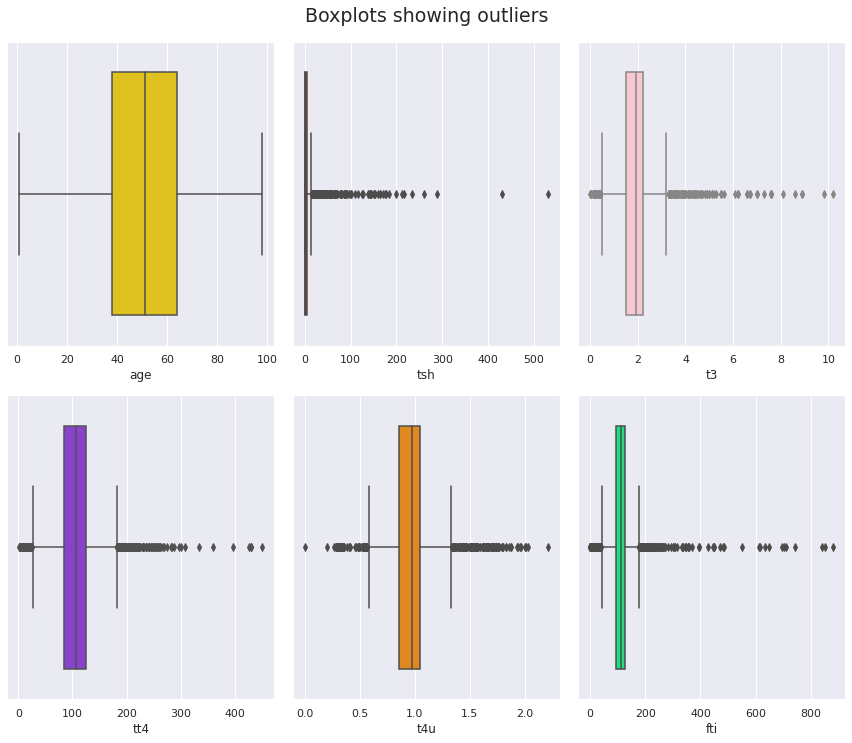

In [982]:
# checking for outliers
fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (12, 10))
colors = ['gold', 'red', 'pink', 'blueviolet','darkorange','springgreen','yellow']
columns = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti','tbg']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), df, columns, colors):
    sns.boxplot(df[column], ax = ax, color = color)
plt.tight_layout()

We can observe that there's no outliers in the age column.

High number of outliers can be observed fti column

We need some of the data contained in the columns containing outliers,So we will not deal with outliers

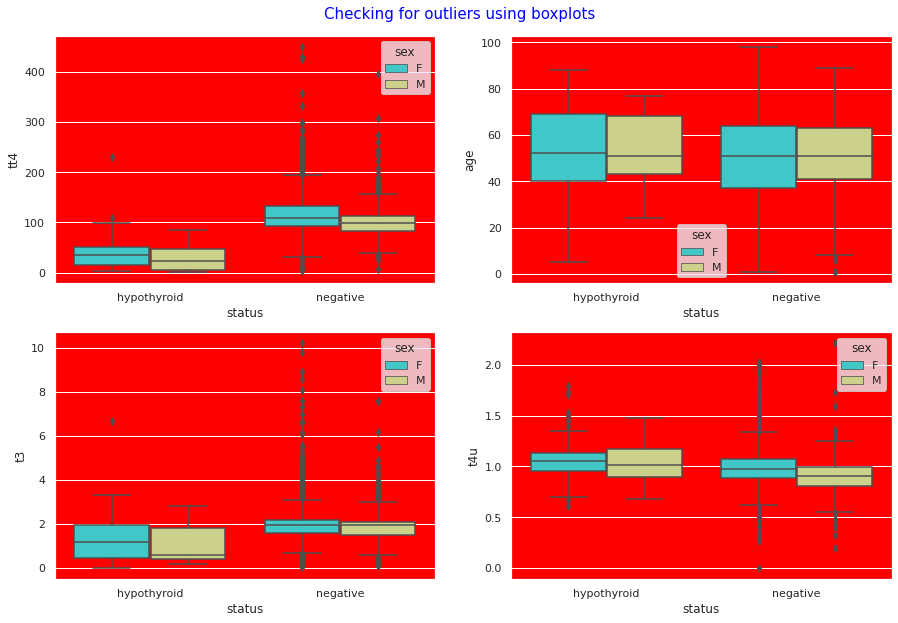

In [983]:
# Plotting boxplots to check for outliers that are  directly affecting our dependent variable
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'blue')
for ax, data, column in zip(axes.flatten(), df, numerical_columns):
  sns.boxplot(df.status, df[column], ax = ax, hue = df.sex, palette = 'rainbow')
  ax.set_facecolor('red') 

We can observe that there's no outliers in the age column.
tsh column has the highest number of outliears when hypothroid diagnosis is positive.
t3 and tt4 columns have the highest number of outliears when hypothroid diagnosis is negative.


We'll will not take any action to deal with outliers since they contain necessary values for our prediction.

**5. Exploratory Data Analysis**

Univalent Analysis

In [984]:
#Summary statistics

df.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,...,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000
unique,2,NaN,2,2,2,2,2,2,2,2,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,False,False,False,False,False,False,False,...,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,...,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN
mean,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.809320,NaN,1.933666,NaN,108.706922,NaN,0.977559,NaN,115.489080
std,NaN,17.854431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.180994,NaN,0.864826,NaN,42.836471,NaN,0.216873,NaN,57.780967
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000
50%,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.933666,NaN,107.000000,NaN,0.977559,NaN,110.000000
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.809320,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000


In [985]:
# dropping unnecessary columns
#df = df.drop(['tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
 #      't4u_measured', 't4u', 'fti_measured', 'fti'], axis = 1)
#df.columns

In [986]:
columns_dictionary = {'goitre': 1, 'age': 2, 'query_hyperthyroid': 3, 'query_on_thyroxine': 4, 'on_antithyroid_medication': 5, 'thyroid_surgery': 6,
       'query_hypothyroid': 7, 'on_thyroxine': 8,'pregnant': 9, 'sick': 10, 'tumor': 11, 'lithium': 12}


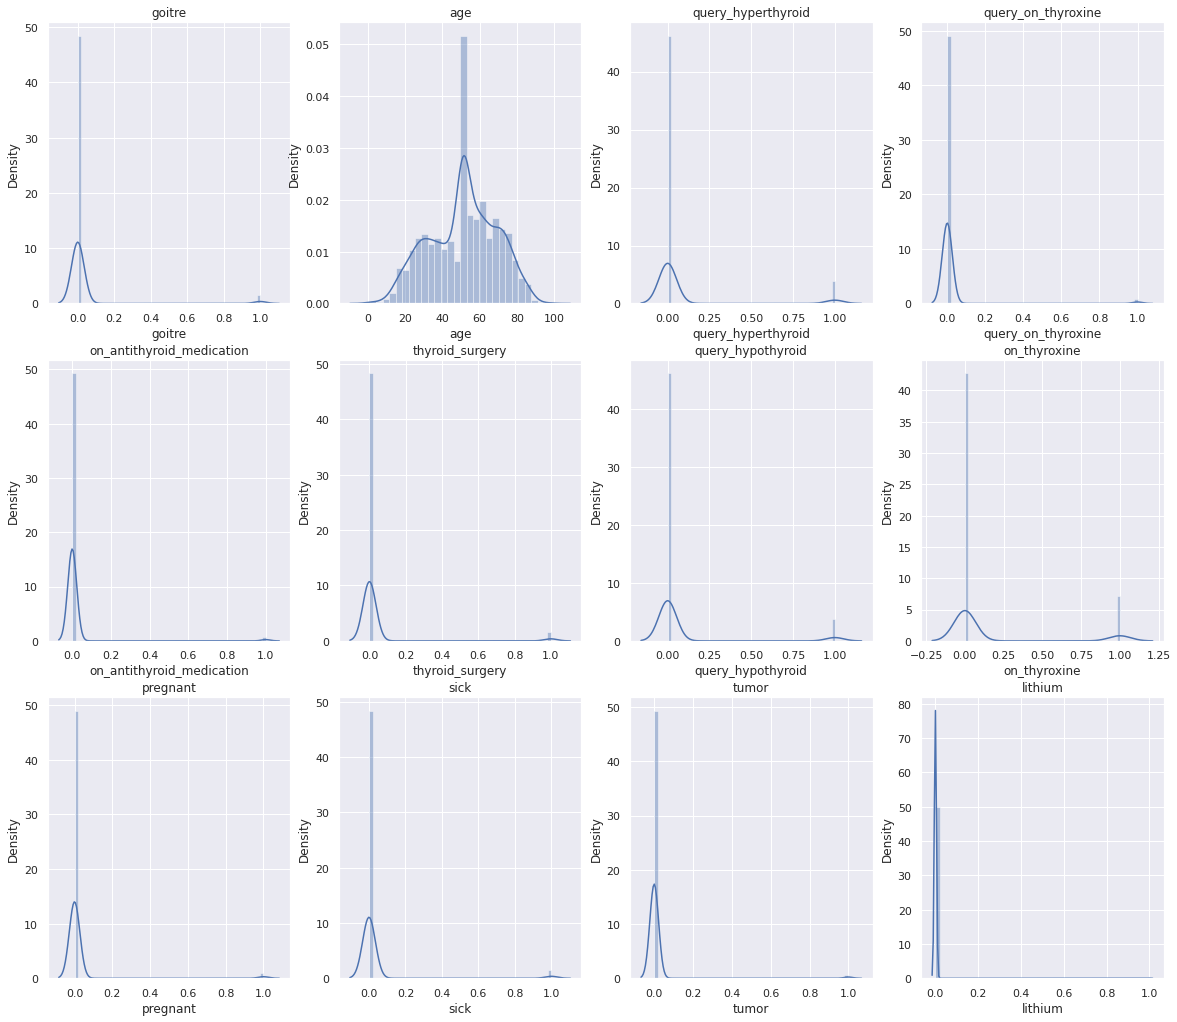

In [987]:
# Ploting the univariate summaries and recording our observations
# plot histograms for  numerical columns
plt.figure(figsize = (20,30))
for variable,i in columns_dictionary.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df[variable])
  plt.title(variable)

 
plt.show()



b) Bivalent Analysis

In [988]:
#Summary statistics

df.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,...,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000
unique,2,NaN,2,2,2,2,2,2,2,2,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,False,False,False,False,False,False,False,...,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,...,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN
mean,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.809320,NaN,1.933666,NaN,108.706922,NaN,0.977559,NaN,115.489080
std,NaN,17.854431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.180994,NaN,0.864826,NaN,42.836471,NaN,0.216873,NaN,57.780967
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000
50%,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.933666,NaN,107.000000,NaN,0.977559,NaN,110.000000
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.809320,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000


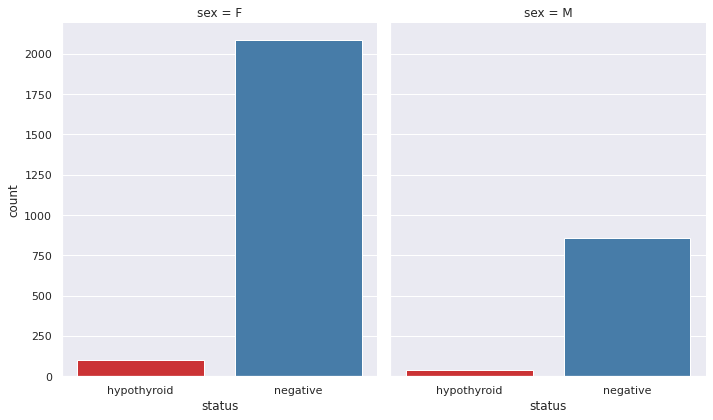

In [989]:
# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

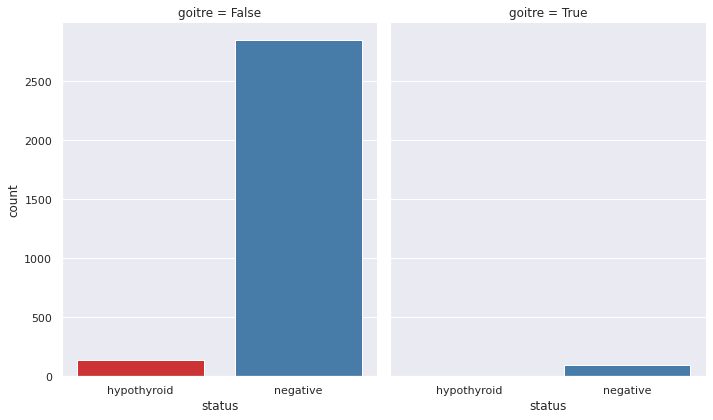

In [990]:
# Plotting bar charts
#
sns.catplot("status", col="goitre", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

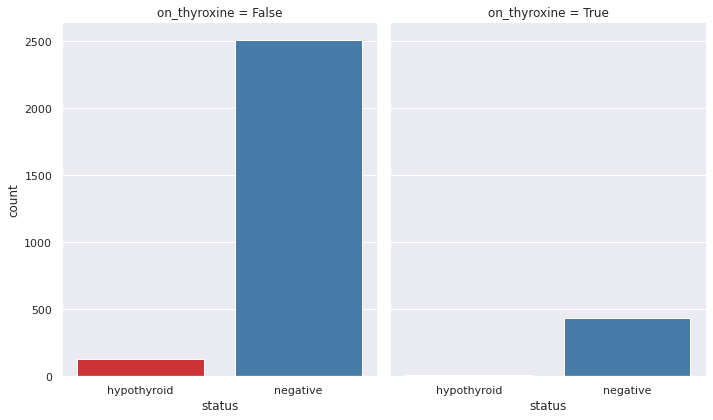

In [991]:
# Plotting bar charts
#
sns.catplot("status", col="on_thyroxine", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

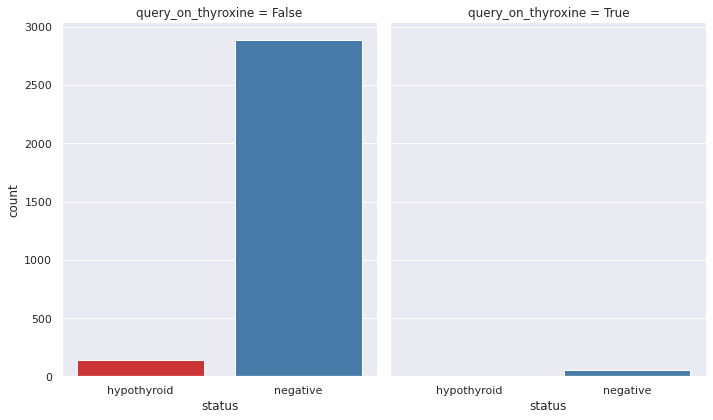

In [992]:
# Plotting bar charts
#
sns.catplot("status", col="query_on_thyroxine", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

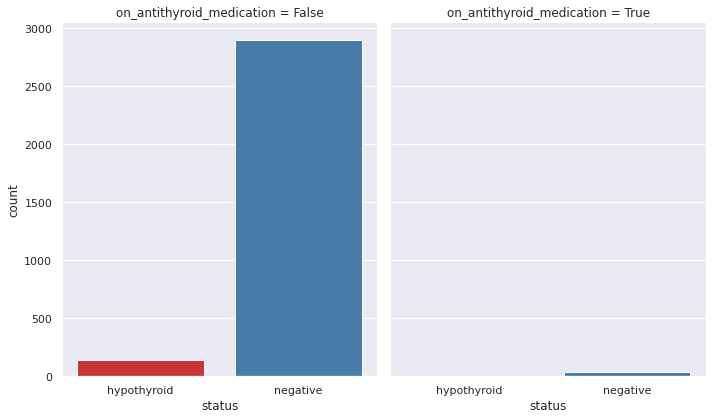

In [993]:
# Plotting bar charts
#
sns.catplot("status", col="on_antithyroid_medication", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

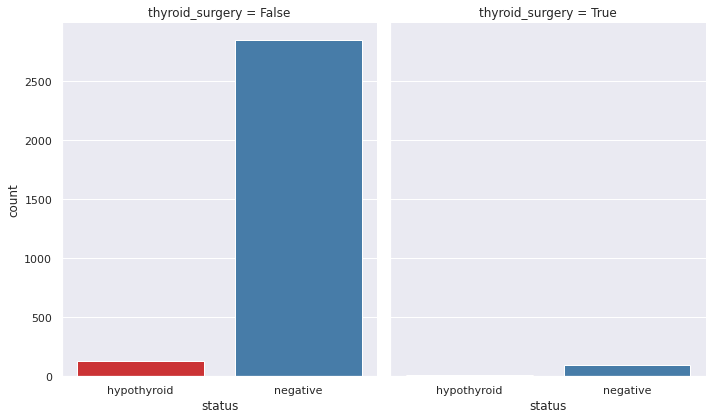

In [994]:
# Plotting bar charts
#
sns.catplot("status", col="thyroid_surgery", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

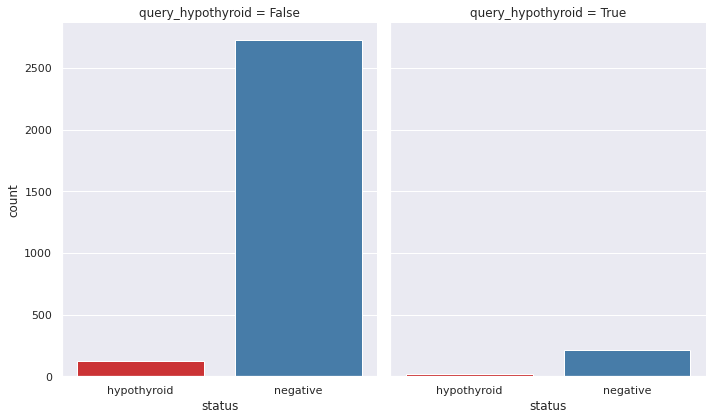

In [995]:
# Plotting bar charts
#
sns.catplot("status", col="query_hypothyroid", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

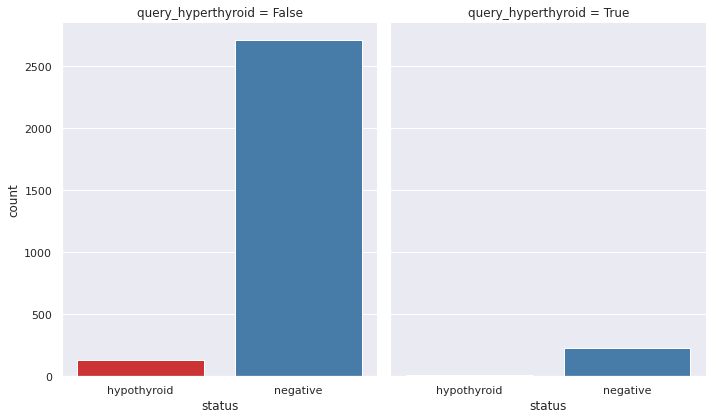

In [996]:
# Plotting bar charts
#
sns.catplot("status", col="query_hyperthyroid", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

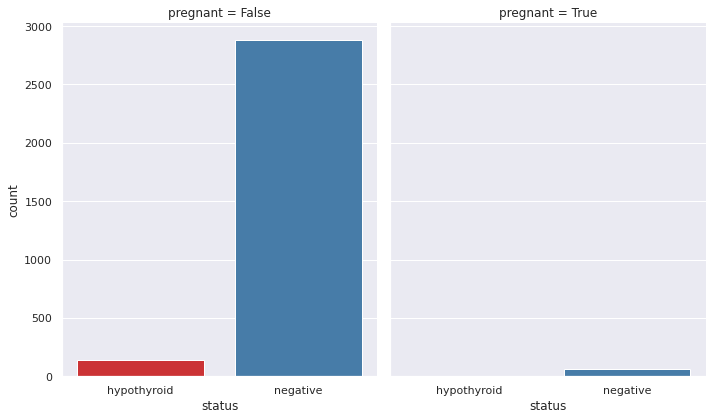

In [997]:
# Plotting bar charts
#
sns.catplot("status", col="pregnant", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

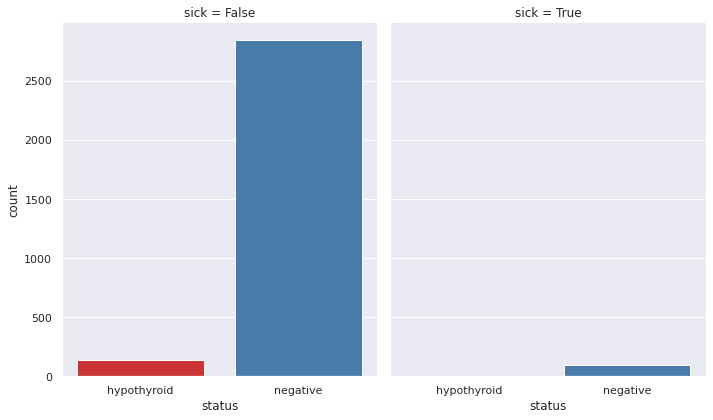

In [998]:
# Plotting bar charts
#
sns.catplot("status", col="sick", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

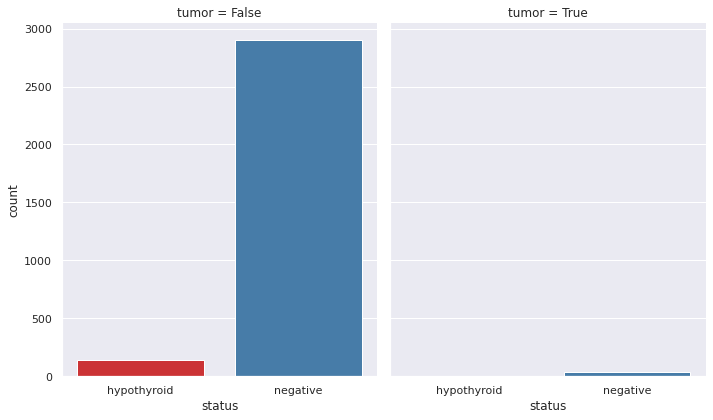

In [999]:
# Plotting bar charts
#
sns.catplot("status", col="tumor", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

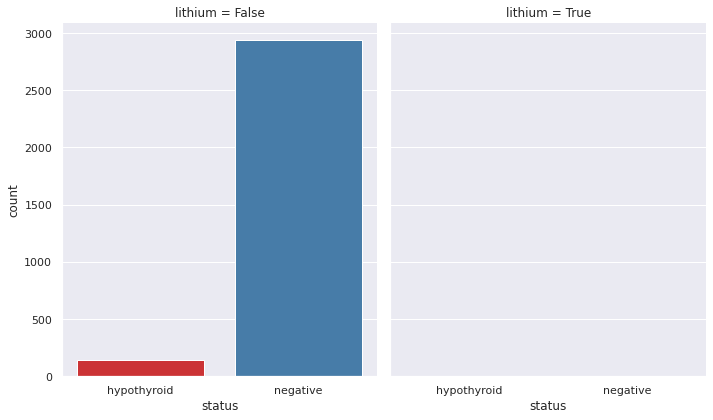

In [1000]:
# Plotting bar charts
#
sns.catplot("status", col="lithium", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

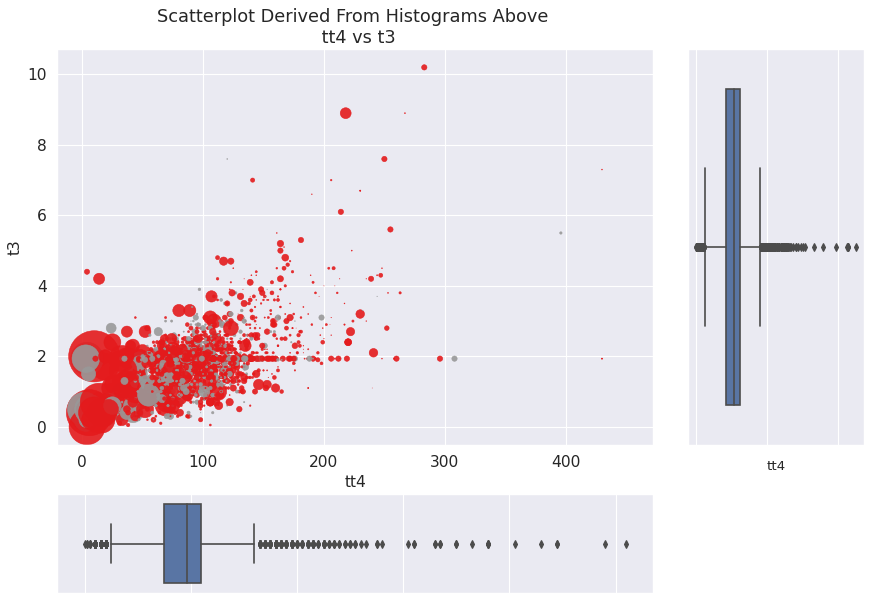

In [1001]:
# Creating Figure and grid specification
#
fig = plt.figure(figsize=(13, 9), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Defining the axes
#
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main axis
#
ax_main.scatter('tt4', 't3', s=df.tsh*4, c=df.sex.cat.codes, alpha=.9, data=df, cmap="Set1", linewidths=.5)

# Adding a graph 
#
sns.boxplot(df.tt4, ax=ax_right, orient="v")
sns.boxplot(df.t3, ax=ax_bottom, orient="h")

#To increse visibility
#Let's Remove x axis name for the boxplot by assigning it to nothing
#
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# title, x-label and y-Label
#
ax_main.set(title='Scatterplot Derived From Histograms Above \n tt4 vs t3', xlabel='tt4', ylabel='t3')

# To set the font size of various components
#Let's do for loop 
#
ax_main.title.set_fontsize(16)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)    
plt.show()

In [1002]:
# correlation between variables
df.corr()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti
age,1.000000,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
on_thyroxine,0.000451,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,-0.005257,0.023279,0.217276,0.071209,0.113350
query_on_thyroxine,-0.019781,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.014676,-0.015133,-0.020294,-0.034741,-0.004659
on_antithyroid_medication,-0.059541,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.001045,0.065626,-0.002745,0.026479,-0.017797
thyroid_surgery,-0.012432,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.012167,-0.007012,-0.016127,0.026078,-0.026105
query_hypothyroid,0.043156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,0.066911,-0.038984,-0.010955,0.044393,-0.046271
query_hyperthyroid,-0.087005,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.022910,0.169325,0.131093,0.070024,0.063286
pregnant,-0.157715,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,-0.012415,0.201960,0.171237,0.323329,-0.005415
sick,0.063078,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,-0.006218,-0.103268,-0.042154,-0.047710,-0.023498
tumor,-0.063738,-0.022658,0.049524,-0.013461,-0.021294,-0.032900,-0.032900,0.004308,-0.020644,1.000000,-0.002918,-0.020534,-0.019244,0.026472,-0.014707,0.024743,-0.026980


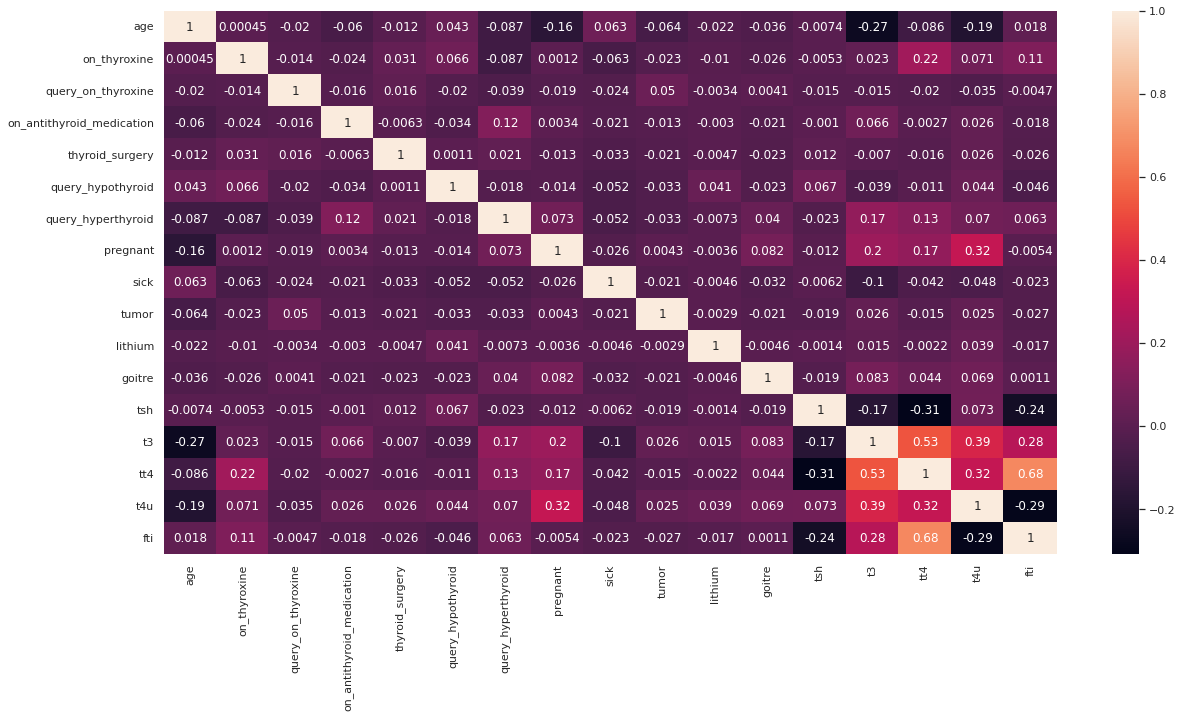

In [1003]:
# Heatmap for correlation
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

From the heatmap above we can make these observations.

There is a strong positive relationship between fti and tt4 of correlation coefficient of 0.68
tt4 and t3 have a positive relationship with a correlation coefficient of 0.53

c) Multivariate Analysis

In [1004]:
# Let's Perform adequacy tests
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 0.0. The test was statistically insignificant, 
#Reject Null Hypothesis

(7777.9811441929105, 0.0)

**6. Implementing the Solution**

Random Forest Classifier

In [1005]:
# Select the independent variables and the target variable(dependent variable)
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
random_forest = RandomForestClassifier(random_state = 0)
random_forest .fit(X_train, y_train)

# Making predictions
#
y_pred = random_forest .predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score of the random forest model is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score of the random forest model is: 0.990280777537797 and the f1 score is 0.8799999999999999


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.92      0.85      0.88        39

    accuracy                           0.99       926
   macro avg       0.95      0.92      0.94       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  6,  33]])

In [1006]:
#Feature Importance

#Selecting the most important feature in prediction 
# Creating a dataframe of features and their respective importance values
#
important_features_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(random_forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_features_df

,importance
feature,
fti,0.3039
tsh,0.2379
tt4,0.2246
t3,0.0786
t4u,0.0479
age,0.0427
query_hypothyroid,0.0100
on_antithyroid_medication,0.0097
tsh_measured_n,0.0060


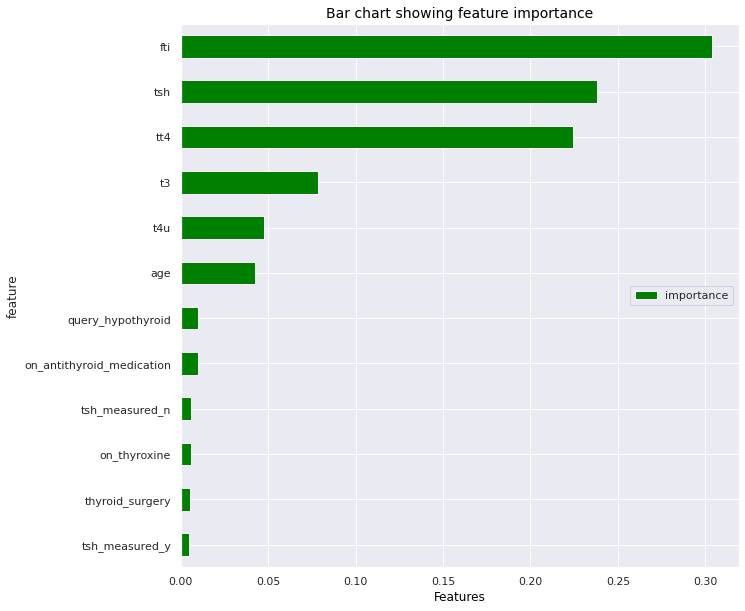

In [1007]:
#Visualising the most important features for prediction
# Creating a bar chart of feature importance in descending order
#
important_features_df = important_features_df[:12].sort_values(by = 'importance', ascending = True)
important_features_df.plot(kind = 'barh', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'Black', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'Black')
plt.show()

From the above feature importance bar chart, we  can be observe that:



The most important feature in predicting whether a person has hypothyroid or not is fti,followed by tsh,tt4,t3,t4u,age,query_hypothyroid,on_antithyroid_medication,tsh_measured_n,on_thyroxine,thyroid_surgery and tsh_measured_y.



The rest of the features including tt4_measured_y,tt4_measured_n ,query_on_thyroxine, tumor,t4u_measured_n,t4u_measured_y ,t3_measured_n      ,t3_measured_y,pregnant,fti_measured_n,query_hyperthyroid  * on_antithyroid_medication,lithium,fti_measured_y and  goitre are not of importance in prediction.

In [1008]:
#Remodelling using   the   most important features 
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score of the remodelled model is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score of the remodelled model is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [1009]:
#Parameter Tuning
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier()

In [1010]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 4, 'n_estimators': 10}


In [1011]:
# Applying the best parameters to the model  using the important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
random_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 0)
random_forest.fit(X_train, y_train)

# Making predictions
#
y_pred = random_forest.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is of the created model: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is of the created model: 0.9881209503239741 and the f1 score is 0.8450704225352113


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.94      0.77      0.85        39

    accuracy                           0.99       926
   macro avg       0.96      0.88      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  9,  30]])

Parameter tuning has  decreased the f1 score from  0.9210526315789475 to f1 score is 0.8450704225352113.And accuracy score from  0.9935205183585313 to 0.9881209503239741. A small difference but atleast the model has improved

Visualising  Third  tree of RandomForestClassifier





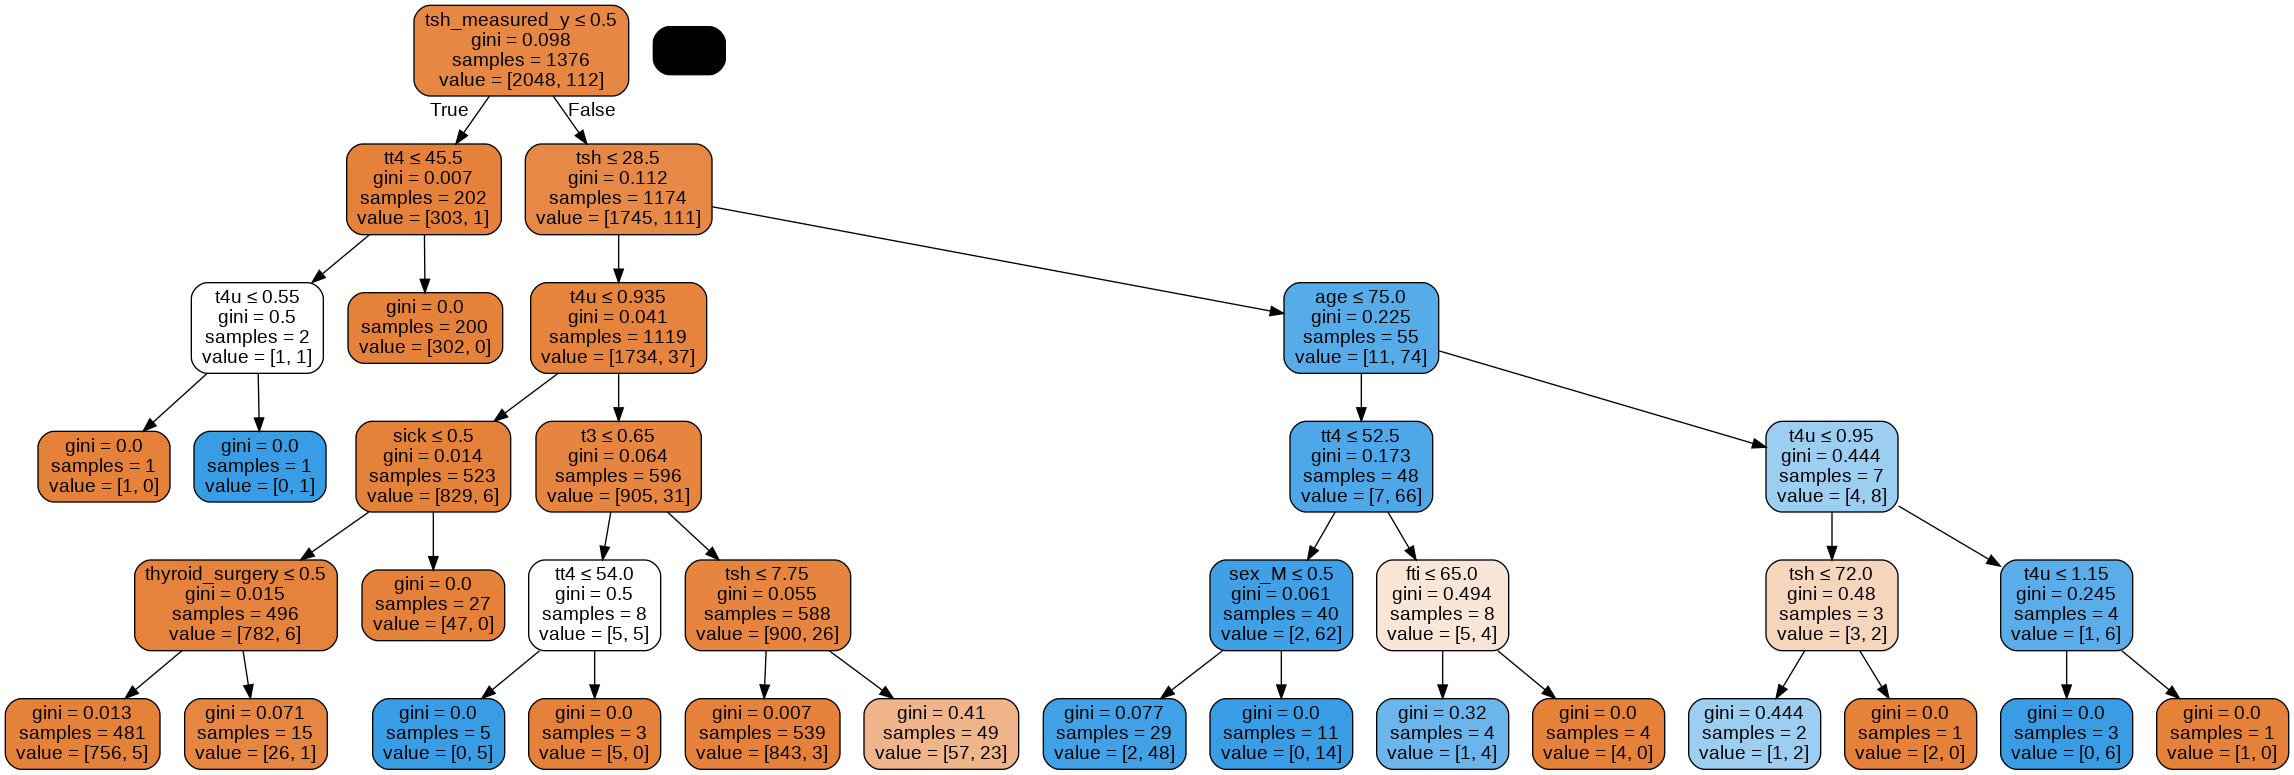

In [1012]:
# Visualizing the  third tree from the forest
tree = random_forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Cross Validation to check for the stability of the model

In [1013]:
# Performing cross validation of 10 folds
#
scores = cross_val_score(random_forest, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8425111925111924
Standard deviation of the cross validation scores is 0.06444041762615443


Ada Boost Classifier

In [1014]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)


# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada_Boost = AdaBoostClassifier(random_state = 0)
ada_Boost.fit(X_train, y_train)

# Making predictions
#
y_pred = ada_Boost.predict(X_test)

# Measuring the accuracy of the model
#
accuracy_1 = accuracy_score(y_test, y_pred)
f1_1score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy_1} and the f1 score is {f1_1score}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [1015]:
#Feature Importance
# previewing the most important features for prediction
# Creating a dataframe of features and their respective importances values
#
important_features_df = pd.DataFrame({'feature': X.columns, 'importance': ada_Boost.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_features_df

,importance
feature,
fti,0.22
age,0.16
tsh,0.16
t4u,0.12
t3,0.12
tt4,0.12
on_antithyroid_medication,0.04
query_hypothyroid,0.02
thyroid_surgery,0.02


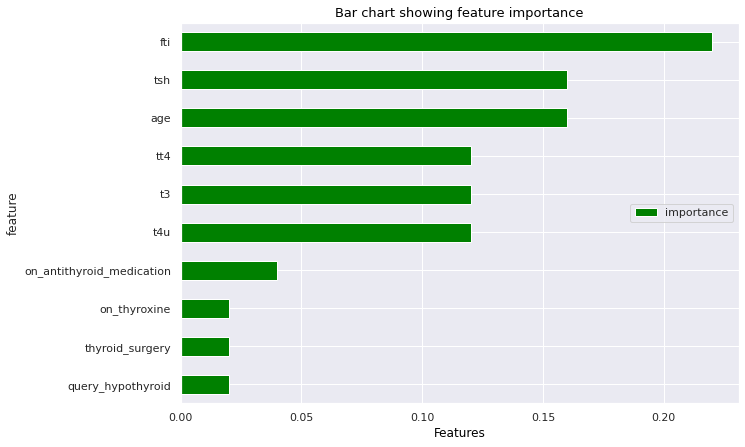

In [1016]:
#Visualising the most important features using a bar chart 
#
important_features_df = important_features_df[:10].sort_values(by = 'importance', ascending = True)
important_features_df.plot(kind = 'barh', figsize = (10, 7), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'black', fontsize = 13)
plt.xlabel('Features', fontsize = 12, color = 'black')
plt.show()

In [1017]:
# Selecting only important features and the y variable
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada_Boost = AdaBoostClassifier(random_state = 0)
ada_Boost.fit(X_train, y_train)

# Making predictions
#
y_pred = ada_Boost.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score of the model is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score of the model is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [1018]:
#Hyperparameter Tuning
# Previewing the parameters to tune
#
AdaBoostClassifier()

AdaBoostClassifier()

In [1019]:
# Creating a dictionary of parameters fro Hyperparameter tuning
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 10}


In [1020]:
# Selecting only important features and the y variable(dependent variable)
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada_Boost = AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state = 0)
ada_Boost.fit(X_train, y_train)

# Making predictions
#
y_pred = ada_Boost.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score of the model is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score of the model is: 0.9924406047516199 and the f1 score is 0.9090909090909091


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.92      0.90      0.91        39

    accuracy                           0.99       926
   macro avg       0.96      0.95      0.95       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  4,  35]])

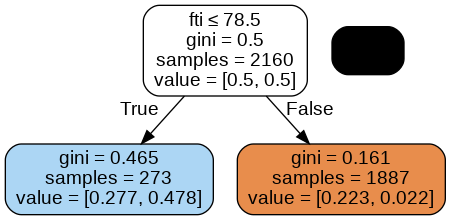

In [1021]:
#Visualising the 3rd tree stump
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada_Boost.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1022]:
#Cross Validation using  ten folds
#
scores = cross_val_score(ada_Boost, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Cross validation scores mean is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f' Cross validation Standard deviation scores is {scores.std()}')

Cross validation scores mean is 0.871661347592382
 Cross validation Standard deviation scores is 0.09766432601055766


In Ada Boosting Mean of cross validation scores is 0.871661347592382
Standard deviation of the cross validation scores is 0.09766432601055766

The RandomForest Mean of cross validation scores is 0.8425111925111924
Standard deviation of the cross validation scores is 0.06444041762615443

Ada Boosting has a greater Mean of cross validation score as compared to RandomForest.Hence in this case, it's evidenced AdaBoostClassifier produced better results as compared to RandomForestClassifier.

Support Vector Classifier

Comparing Support Vector 

In [1023]:
# Selecting the independent variables and the target variable
#
X = df[['fti', 'tsh']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
polynomial = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models =>The  3 models
#
models = [polynomial, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains each model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
   # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} model is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial model is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     model is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        model is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


The accuracy scores and F1 score of the three models are  slightly different.But we can observe Linear has the highest accuracy score of 0.9859611231101512 anf f1 score of 0.8169014084507042.Therefore it is the best kernel as compared to Polynomial and Rbf

In [1024]:
#Hyperparameter tuning
# to find the optimal C and gamma values
# Previewing parameters of the SVC model that can be tuned
#
SVC()

SVC()

In [1025]:
# Creating a dictionary of parameters to tune
#
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 
# 
kfold = KFold(n_splits=3, shuffle=True)
#instantiating the model
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = df[['fti', 'tsh']]
y = np.where(df.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 17.791666666666668, 'C': 81}


In [1026]:
#Remodelling with optimal parameters
# Selecting important features and dependent variable y
#
X = df.drop('status', axis = 1)

y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 21, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)
# Measuring the accuracy of the model
#
print(f'The accuracy score of the model  is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score of the model  is: 0.9881209503239741 and the f1 score is 0.8493150684931507


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.91      0.79      0.85        39

    accuracy                           0.99       926
   macro avg       0.95      0.90      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  8,  31]])

In [1027]:
#Performing Cross validation 
# Performing cross validation of 10 folds
#
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating  the cross validation scores  mean
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8133239546283024
Standard deviation of the cross validation scores is 0.07691071483570998


support vector Classifier has a Mean of cross validation scores is  0.8133239546283024 and Standard deviation of the cross validation scores of 0.07691071483570998.


The scores are less as compared to Ada Boosting scores.Ada still boosting outstands 

**Challenging the solution**

In [1029]:
# Using different models to check whether performance can be improved
# Creating a list of classifier algorithms to compare with
#
models = [GradientBoostingClassifier(), DecisionTreeClassifier(), XGBClassifier(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
GradientBoosting, DecisionTree, XGB,LogisticRegression = ([] for x in range(4))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [GradientBoosting, DecisionTree, XGB, LogisticRegression]

# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)


# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, shuffle = True, random_state = 0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'f1', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'GradientBoosting': GradientBoosting, 'DecisionTree': DecisionTree, 'XGB': XGB,'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores


,GradientBoosting,DecisionTree,XGB,LogisticRegression
1,0.960000,0.923077,1.000000,0.909091
2,0.880000,0.923077,0.880000,0.782609
3,0.965517,1.000000,1.000000,0.846154
4,0.941176,0.875000,0.941176,0.838710
5,0.971429,0.914286,0.971429,0.812500
6,0.761905,0.761905,0.782609,0.736842
7,0.864865,0.857143,0.914286,0.838710
8,0.810811,0.742857,0.857143,0.666667
9,0.952381,0.909091,0.952381,0.947368
10,0.869565,0.761905,0.833333,0.761905


In [1030]:
# Let's print the model with with the highest F1 Score and Accuracy score
#
scores.loc['mean'].idxmax()

'XGB'



From the observation above,our alternative model would be XGB Classifier.Infact it outstands adaBoost Model in terms of performance due to it's higher accuracy score and F1 score

**Conclusion**


We can conclude that, Ada Boost Classier would be our best model to predict whether a person has hypothroid and In SVC, linear kernel would be the best for prediction purpose. 